In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('rieltor_subways_new2.csv')

df = df[df['rooms'] <= 3]
df = df[df['price'] <= 200000]

df.head(3)

,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,...,type_of_condition,Unnamed: 14,prestigious,code condition,code type,price_category,closest_subway,subway_location,distance_to_subway,distance_category
0,https://rieltor.ua/flats-rent/view/10834307/,2.0,24500.0,109.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1-Б",50.395950,30.599648,NaN,...,Дизайнерський ремонт,NaN,1,5,5,20000-40000,Славутич,"50.394167, 30.604167",0.376771,1
1,https://rieltor.ua/flats-rent/view/10832872/,2.0,24500.0,112.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1б",50.395950,30.599648,NaN,...,Дизайнерський ремонт,NaN,1,5,5,20000-40000,Славутич,"50.394167, 30.604167",0.376771,1
2,https://rieltor.ua/flats-rent/view/10725408/,2.0,22000.0,94.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,...,Євроремонт,NaN,3,4,4,20000-40000,Печерська,"50.4275, 30.538889",0.279936,1


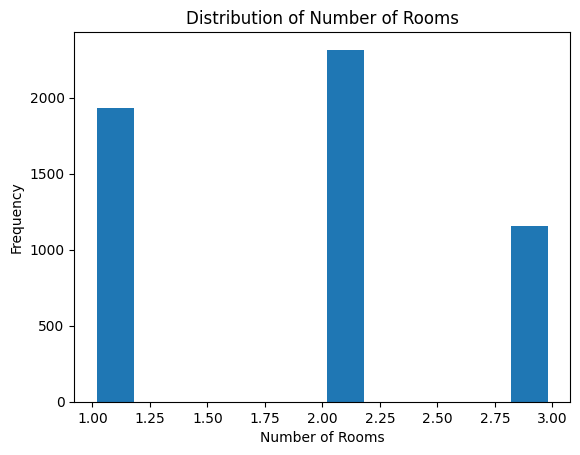

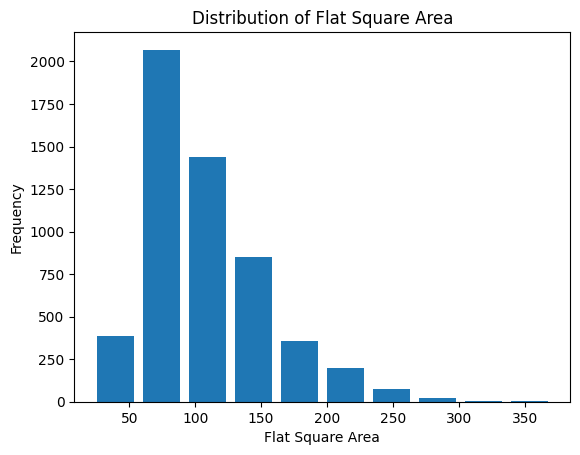

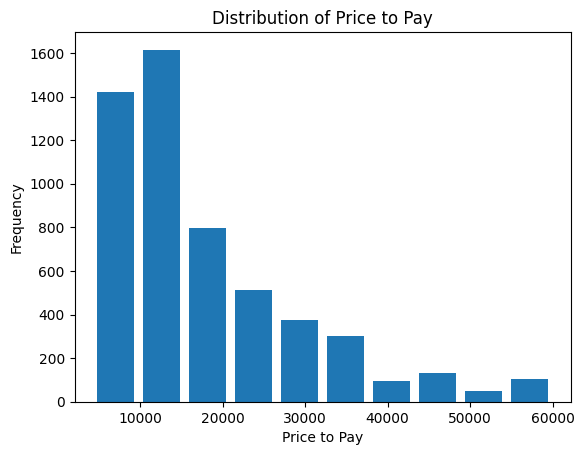

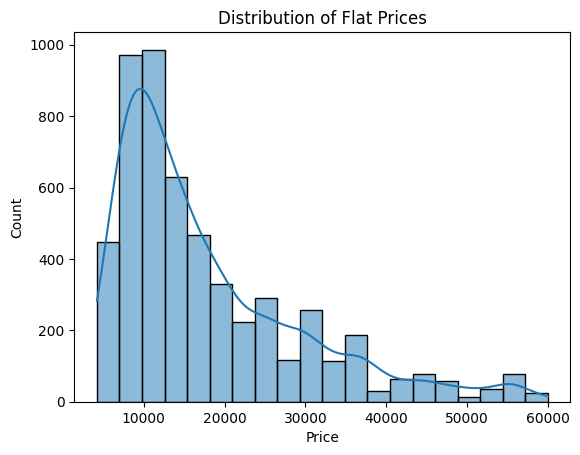

In [5]:
df['rooms'].plot.hist(rwidth=0.8)
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Rooms')
plt.show()

df['flat_area'].plot.hist(rwidth=0.8)
plt.xlabel('Flat Square Area')
plt.ylabel('Frequency')
plt.title('Distribution of Flat Square Area')
plt.show()

df['price'].plot.hist(rwidth=0.8)
plt.xlabel('Price to Pay')
plt.ylabel('Frequency')
plt.title('Distribution of Price to Pay')
plt.show()

sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Flat Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

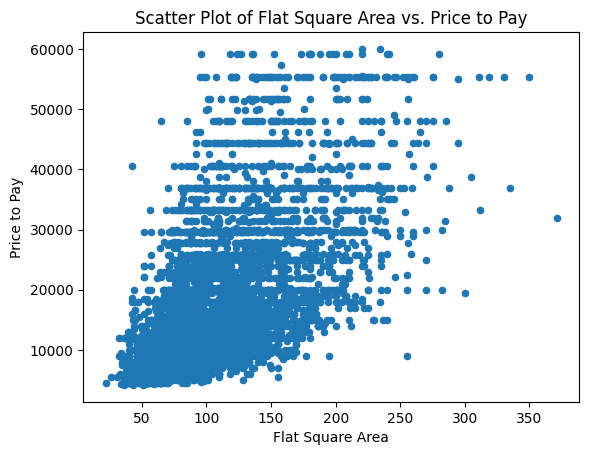

In [6]:
df.plot.scatter(x='flat_area', y='price')
plt.xlabel('Flat Square Area')
plt.ylabel('Price to Pay')
plt.title('Scatter Plot of Flat Square Area vs. Price to Pay')
plt.show()

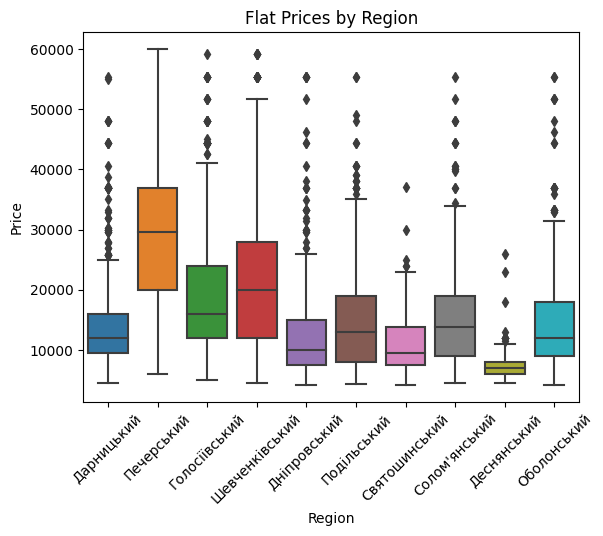

In [7]:
sns.boxplot(x='district', y='price', data=df)
plt.title('Flat Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

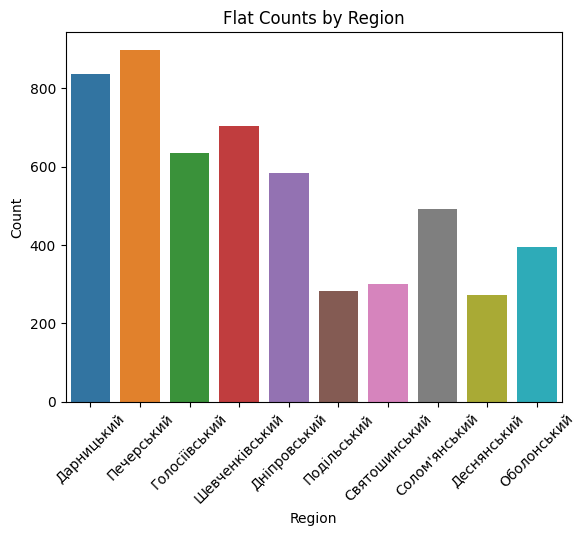

In [8]:
sns.countplot(x='district', data=df)
plt.title('Flat Counts by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


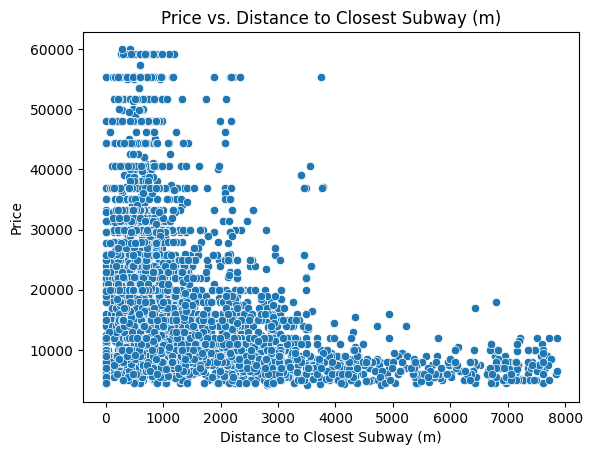

In [17]:
df['distance_to_subway_m'] = df['distance_to_subway'] * 1000
# drop distances greater than 10000
df = df[df['distance_to_subway_m'] <= 10000]
sns.scatterplot(x='distance_to_subway_m', y='price', data=df)
plt.title('Price vs. Distance to Closest Subway (m)')
plt.xlabel('Distance to Closest Subway (m)')
plt.ylabel('Price')
plt.show()

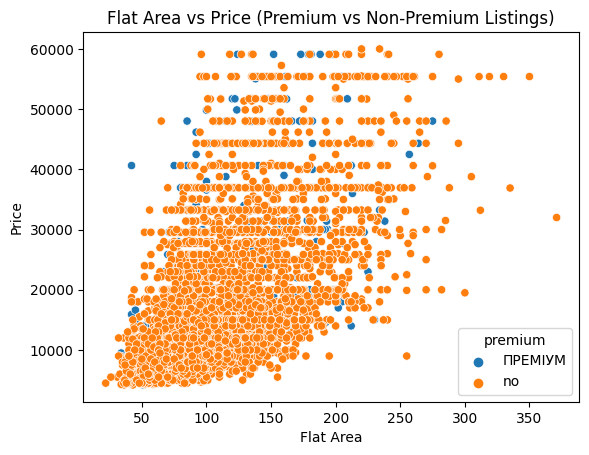

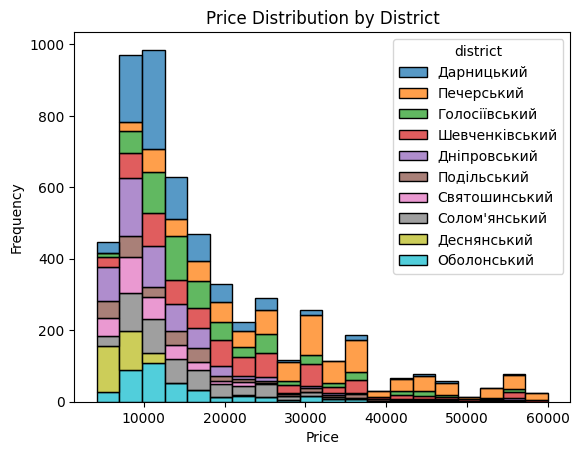

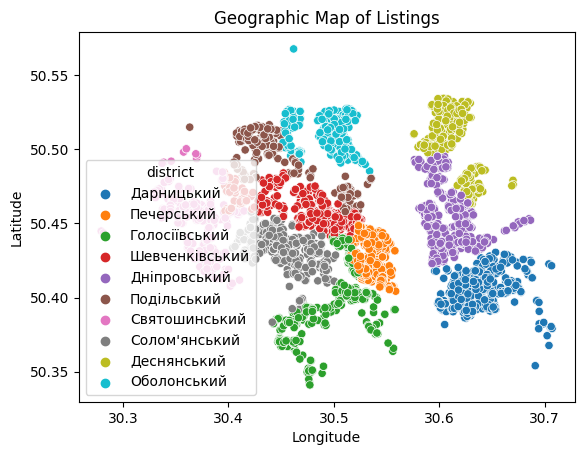

In [27]:
# Scatter plot of flat_area vs price, with colors for premium and non-premium listings
sns.scatterplot(x='flat_area', y='price', hue='premium', data=df)
plt.title('Flat Area vs Price (Premium vs Non-Premium Listings)')
plt.xlabel('Flat Area')
plt.ylabel('Price')
plt.show()

# Histogram of prices, with colors for different districts
sns.histplot(data=df, x='price', hue='district', bins=20, multiple='stack')
plt.title('Price Distribution by District')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Map plot of listings using longitude and latitude coordinates (assuming available in dataset)
sns.scatterplot(x='longitude', y='latitude', hue='district', data=df)
plt.title('Geographic Map of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


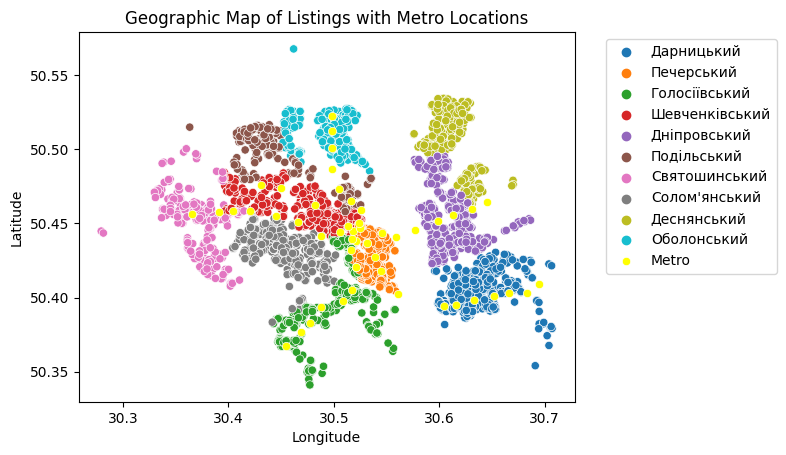

In [41]:
# Load metro locations data from Excel file
subway_locations = pd.read_excel('metro stations.xlsx')
subway_locations.columns = ['name', 'Latitude', 'Longitude']
# Map plot of listings using longitude and latitude coordinates (assuming available in dataset)
sns.scatterplot(x='longitude', y='latitude', hue='district', data=df)

# Plot metro locations using scatter function from Seaborn
sns.scatterplot(x='Longitude', y='Latitude', data=subway_locations, label='Metro', color='yellow')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Geographic Map of Listings with Metro Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()